In [1]:
from ekpy import analysis
import numpy as np
import scipy.integrate as it
from scipy.signal import find_peaks, savgol_filter, peak_widths
import matplotlib.pyplot as plt
from ekpy.analysis.analysisgeotemp import use_analysis_file #note need to make this under __all__

In [2]:
# load the dataset
Data_folder_path = "C:/Users/geofr/Desktop/Research/Data/FE/PUND/Python/"

dset = analysis.load_Dataset(Data_folder_path + r'BTO13')

# print dset, parsable collection of meta data which holds pointers to the real data files
dset

,pulse_width,pulse_delay,voltage_max,num_points,step_size,capacitor_area,thickness,permittivity,format,type,points,count,x_increment,x_origin,x_reference,y_increment,y_origin,y_reference,trial,filename
0,0.000002,0.0002,0.1,20,NaN,4.000000e-08,1.000000e-08,30,0,0,85000,1,1.200000e-08,-0.000024,0,0.000201,0.0,0,0,fe_PUND__0.csv
1,0.000002,0.0002,0.2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,85000,1,1.200000e-08,-0.000024,0,0.000402,0.0,0,1,fe_PUND__1.csv
2,0.000002,0.0002,0.3,20,NaN,4.000000e-08,1.000000e-08,30,0,0,85000,1,1.200000e-08,-0.000024,0,0.000563,0.0,0,2,fe_PUND__2.csv
3,0.000002,0.0002,0.4,20,NaN,4.000000e-08,1.000000e-08,30,0,0,85000,1,1.200000e-08,-0.000024,0,0.000764,0.0,0,3,fe_PUND__3.csv
4,0.000002,0.0002,0.5,20,NaN,4.000000e-08,1.000000e-08,30,0,0,85000,1,1.200000e-08,-0.000024,0,0.000965,0.0,0,4,fe_PUND__4.csv
5,0.000002,0.0002,0.6,20,NaN,4.000000e-08,1.000000e-08,30,0,0,85000,1,1.200000e-08,-0.000024,0,0.001166,0.0,0,5,fe_PUND__5.csv
6,0.000002,0.0002,0.7,20,NaN,4.000000e-08,1.000000e-08,30,0,0,85000,1,1.200000e-08,-0.000024,0,0.001327,0.0,0,6,fe_PUND__6.csv
7,0.000002,0.0002,0.8,20,NaN,4.000000e-08,1.000000e-08,30,0,0,85000,1,1.200000e-08,-0.000024,0,0.001528,0.0,0,7,fe_PUND__7.csv
8,0.000002,0.0002,0.9,20,NaN,4.000000e-08,1.000000e-08,30,0,0,85000,1,1.200000e-08,-0.000024,0,0.001729,0.0,0,8,fe_PUND__8.csv
9,0.000002,0.0002,1.0,20,NaN,4.000000e-08,1.000000e-08,30,0,0,85000,1,1.200000e-08,-0.000024,0,0.001930,0.0,0,9,fe_PUND__9.csv


In [12]:
data2= dset.select_index(0).get_data()
data2

{0: {'data': {'time_c': array([-0.00119526, -0.00119466, -0.00119406, ...,  0.04980294,
        0.04980354,  0.04980414]),
              'time_v': array([-0.00119526, -0.00119466, -0.00119406, ...,  0.04980294,
        0.04980354,  0.04980414]),
              'wfm_c': array([-0.000201  ,  0.        , -0.000201  , ..., -0.00040201,
       -0.00040201, -0.000201  ]),
              'wfm_v': array([-0.00132663,  0.        , -0.00132663, ...,  0.        ,
       -0.00132663, -0.00132663])},
     'definition': {'capacitor_area': {4e-08},
                    'count': {1},
                    'format': {0},
                    'num_points': {20},
                    'permittivity': {30},
                    'points': {85000},
                    'pulse_delay': {0.01},
                    'pulse_width': {0.0001},
                    'step_size': {nan},
                    'thickness': {1e-08},
                    'trial': {0},
                    'type': {0},
                    'voltage_max': 

(<Figure size 640x480 with 1 Axes>, <Axes: >)

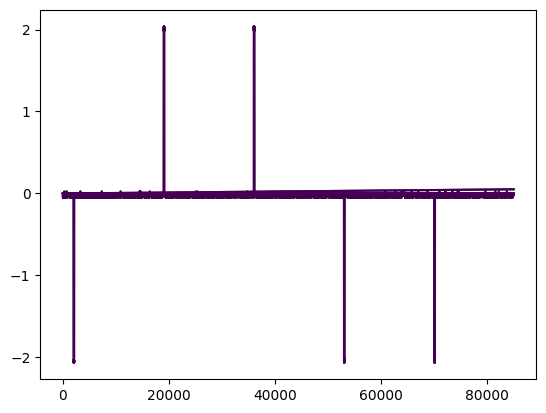

In [4]:
data2.plot()

In [3]:
data3 = dset.query("voltage_max > 1")
data3

,pulse_width,pulse_delay,voltage_max,num_points,step_size,capacitor_area,thickness,permittivity,format,type,points,count,x_increment,x_origin,x_reference,y_increment,y_origin,y_reference,trial,filename
0,0.000002,0.0002,1.1,20,NaN,4.000000e-08,1.000000e-08,30,0,0,85000,1,1.200000e-08,-0.000024,0,0.002090,0.0,0,10,fe_PUND__10.csv
1,0.000002,0.0002,1.2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,85000,1,1.200000e-08,-0.000024,0,0.002291,0.0,0,11,fe_PUND__11.csv
2,0.000002,0.0002,1.3,20,NaN,4.000000e-08,1.000000e-08,30,0,0,85000,1,1.200000e-08,-0.000024,0,0.002492,0.0,0,12,fe_PUND__12.csv
3,0.000002,0.0002,1.4,20,NaN,4.000000e-08,1.000000e-08,30,0,0,85000,1,1.200000e-08,-0.000024,0,0.002693,0.0,0,13,fe_PUND__13.csv
4,0.000002,0.0002,1.5,20,NaN,4.000000e-08,1.000000e-08,30,0,0,85000,1,1.200000e-08,-0.000024,0,0.002854,0.0,0,14,fe_PUND__14.csv
5,0.000002,0.0002,1.6,20,NaN,4.000000e-08,1.000000e-08,30,0,0,85000,1,1.200000e-08,-0.000024,0,0.003055,0.0,0,15,fe_PUND__15.csv
6,0.000002,0.0002,1.7,20,NaN,4.000000e-08,1.000000e-08,30,0,0,85000,1,1.200000e-08,-0.000024,0,0.003256,0.0,0,16,fe_PUND__16.csv
7,0.000002,0.0002,1.8,20,NaN,4.000000e-08,1.000000e-08,30,0,0,85000,1,1.200000e-08,-0.000024,0,0.003457,0.0,0,17,fe_PUND__17.csv
8,0.000002,0.0002,1.9,20,NaN,4.000000e-08,1.000000e-08,30,0,0,85000,1,1.200000e-08,-0.000024,0,0.003618,0.0,0,18,fe_PUND__18.csv
9,0.000002,0.0002,2.0,20,NaN,4.000000e-08,1.000000e-08,30,0,0,85000,1,1.200000e-08,-0.000024,0,0.003819,0.0,0,19,fe_PUND__19.csv


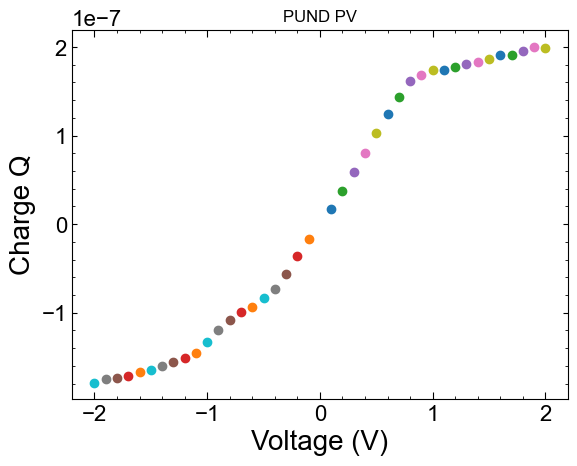

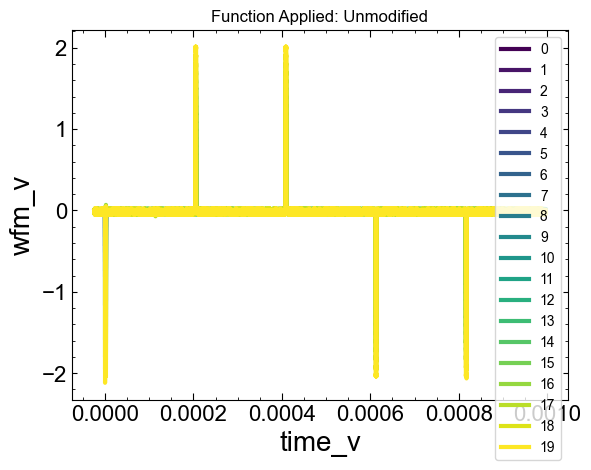

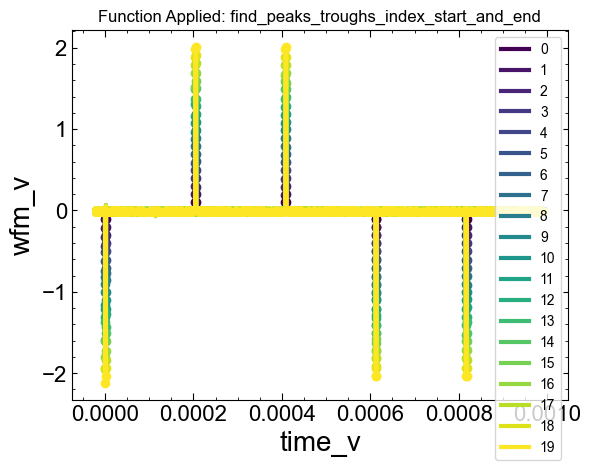

In [18]:
modified_data, interm_steps = use_analysis_file('analysisfile', dset, verbose=True, dont_pass_defn=False)

In [32]:
modified_data.data_keys

['time_v', 'wfm_v', 'time_c', 'wfm_c', 'calc_vals']

In [15]:
x = data2.time_v
y = data2.wfm_v
x1 = data2.time_c
y2 = data2.wfm_c
len(y)

85000

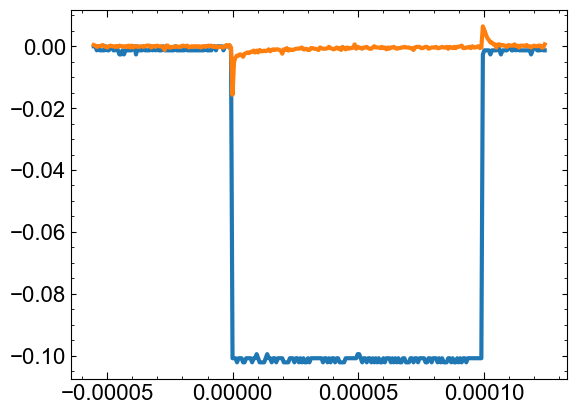

In [16]:
plt.plot(x[1900:2200],y[1900:2200])
plt.plot(x1[1900:2200],y2[1900:2200])
